In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
from scipy.integrate import quad
%matplotlib inline

In [2]:
def f(x):
    k = 2
    return -(k*np.pi)**2 * np.sin(2*np.pi*x)

def uexact(x):
    k = 2
    return np.sin(k*np.pi*x) + 3*x + 4

In [29]:
def phi(x, t, i, k):
    """
    A basis function
    
    x : float or array
        evaluation point
    
    t : array
        mesh nodes
        
    i : int
        basis id
        
    k : int
        basis degree
    """
    b = BSpline.basis_element(t[i:i+k+2], extrapolate=False)
    s = np.nan_to_num(b(x))
    return s

def dphi(x, t, i, k):
    if np.abs(t[i+k]  -t[i]) < 1e-14:
        p1 = 0*x
    else:
        p1 = phi(x, t, i,   k-1) / (t[i+k]  -t[i])
    if np.abs(t[i+k+1]-t[i+1]):
        p2 = 0*x
    else:
        p2 = phi(x, t, i+1, k-1) / (t[i+k+1]-t[i+1])
    ds = k*(p1 - p2)
    return ds

7.0
7.0


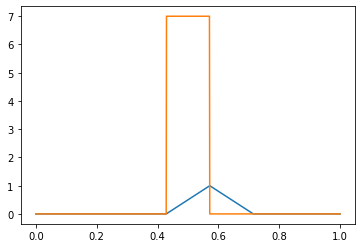

In [30]:
n = 8
k = 3
t = np.linspace(0, 1, n)
x = np.linspace(0, 1, 1000)
p = phi(x, t, 3, 1)
dp = dphi(x, t, 3, 1)
plt.plot(x, p)
plt.plot(x, dp)
print(dp.max())
print(1/(t[2]-t[1]))

2.328661995328662
2.3333333333333335


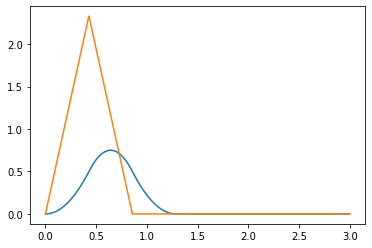

In [31]:
# https://en.wikipedia.org/wiki/B-spline#/media/File:Cardinal_quadratic_B_spline.svg
n = 8
t = np.linspace(0, 3, n)
x = np.linspace(0, 3, 1000)
p = phi(x, t, 0, 2)
dp = dphi(x, t, 0, 2)
plt.plot(x, p)
plt.plot(x, dp)
print(dp.max())
print(1/(t[2]-t[1]))

[0. 0. 0. 0. 1. 2. 3. 4. 4. 4. 4.]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


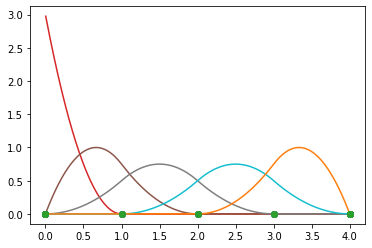

In [32]:
k = 3
n = 5
t = np.zeros(n+2*k)
t[k:-k] = np.linspace(0, 4, n)
t[:k] = t[k]
t[-k:] = t[-k-1]
print(t)
x = np.linspace(0, 4, 1000)[1:-1]

plt.figure()
for i in range(0,n+k-1):
    plt.plot(t, 0*t, 'o')
    plt.plot(x, dphi(x, t, i, k))

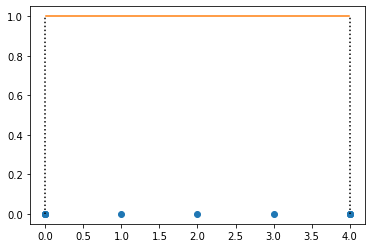

In [16]:
z = np.zeros_like(x)
for i in range(0,n+k-1):
    z += phi(x, t, i, k)
plt.plot(t, 0*t, 'o')
plt.plot(x, z)
plt.plot([t[0],t[0]], [0,1], ':k')
plt.plot([t[-1],t[-1]], [0,1], ':k')

[0. 0. 0. 0. 1. 2. 3. 4. 4. 4. 4.]
3 4 0.0 1.0
nan nan
4 5 1.0 2.0
0.04999999999999998 0.04999999999999998
5 6 2.0 3.0
0.058333333333333334 0.058333333333333334
6 7 3.0 4.0
0.09999999999999998 0.09999999999999998
7 8 4.0 4.0
0.0 0.0
8 9 4.0 4.0
nan nan
9 10 4.0 4.0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


IndexError: index 11 is out of bounds for axis 0 with size 11

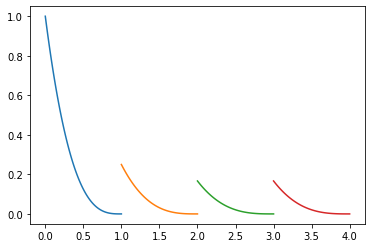

In [23]:
k = 3
n = 5
t = np.zeros(n+2*k)
t[k:-k] = np.linspace(0, 4, n)
t[:k] = t[k]
t[-k:] = t[-k-1]
print(t)
h = t[k+1]-t[k]
x = np.linspace(0, 4, 1000)[1:-1]

def dphidphi(x, t, i, j, k):
    return dphi(x, t, i, k)*dphi(x, t, j, k)

for i in range(0,n+k-1):
    print(i+k,  i+k+1,  t[i+k],  t[i+k+1])
    val, err = quad(func=dphidphi, a=t[i+k], b=t[i+k+1], args=(t, i, i+1, k))
    print(val, val*h)
    xx = np.linspace(t[i+k], t[i+k+1], 100)
    plt.plot(xx, phi(xx, t, i, k))